In [1]:
# import the faves
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data & print the sheet names
excel_file = pd.ExcelFile('naplan_results.xlsx')
print(excel_file.sheet_names)

['Data dictionary', 'Subgroup descriptions', 'NAPLAN Results', 'State comparisons', 'Subgroup comparisons', 'Year on year comparisons']


In [8]:
naplan_results = pd.read_excel(excel_file, sheet_name='NAPLAN Results')

In [22]:
# copy to a new variable for convenience
data = naplan_results.copy()

# lowercase and remove trailing information from column names
data.columns = data.columns.str.strip().str.lower()
data.columns = data.columns.str.replace(r'\s*\(.*\)', '', regex=True)
data.columns = data.columns.str.replace(r'\s+', '_', regex=True)

In [31]:
data.head(1)
#data.info()
#data['calendar_year'].value_counts()

,calendar_year,year_level,domain,state/territory,student_attribute,subgroup,reporting_flag,enrolled_students,assessed,exempt,...,absent,withdrawn,average_age,average_naplan_score,average_naplan_score_confidence_interval,naplan_score_standard_deviation,needs_additional_support,developing,strong,exceeding
0,2024,3,Reading,New South Wales,All,All,NaN,99027.0,95.185152,1.669242,...,977.0,2045.0,8yrs 6mths,410.531637,2.103687,91.442481,10.118856,19.415917,46.651317,22.144668


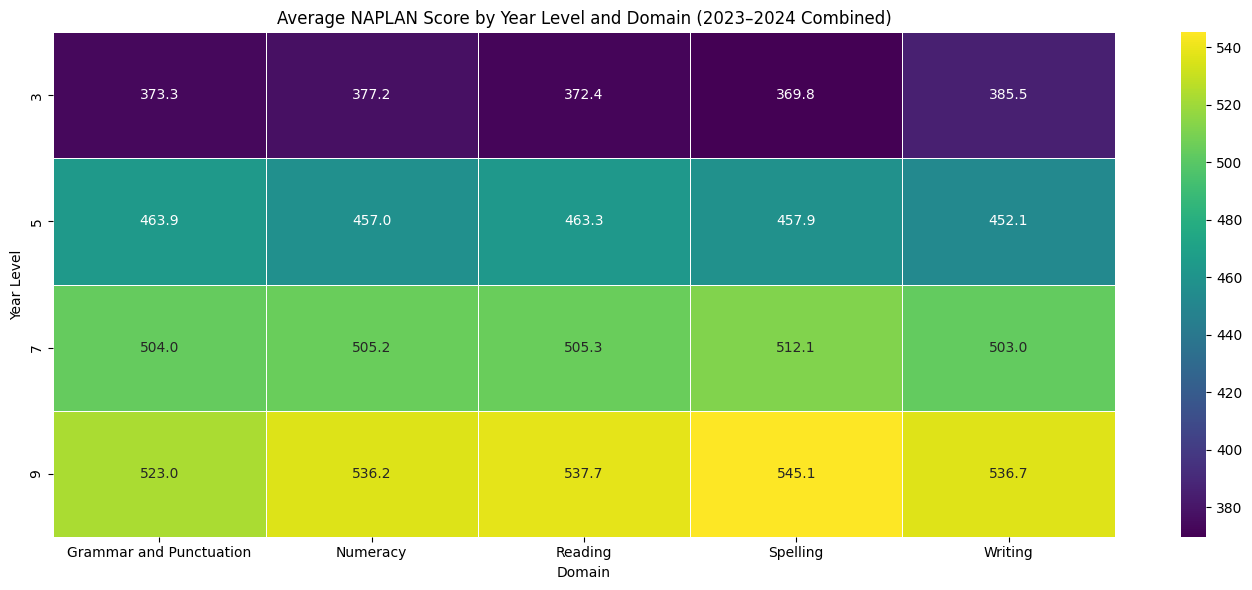

In [33]:
performance = (
    data
    .groupby(['year_level', 'domain'], as_index=False)
    .agg({'average_naplan_score': 'mean'})
)
# Pivot for heatmap: year levels as rows, domains as columns
pivot = performance.pivot(index='year_level', columns='domain', values='average_naplan_score')

plt.figure(figsize=(14,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="viridis", linewidths=.5)
plt.title("Average NAPLAN Score by Year Level and Domain (2023–2024 Combined)")
plt.ylabel("Year Level")
plt.xlabel("Domain")
plt.tight_layout()
plt.show()


## Visualizing Australia: Key Insights from Our Data Journey
Monthly Birth Patterns
Our monthly birth visualization reveals Australia's remarkably consistent seasonal rhythms:

October peak/February low pattern persists across years, suggesting conception peaks during summer holidays
Minimal disruption during COVID-19 to these seasonal patterns despite overall number changes
Narrow variation range (just 1-2% difference) between highest and lowest birth months
> The seasonal consistency suggests biological or social factors influencing family planning that transcend even major disruptions.

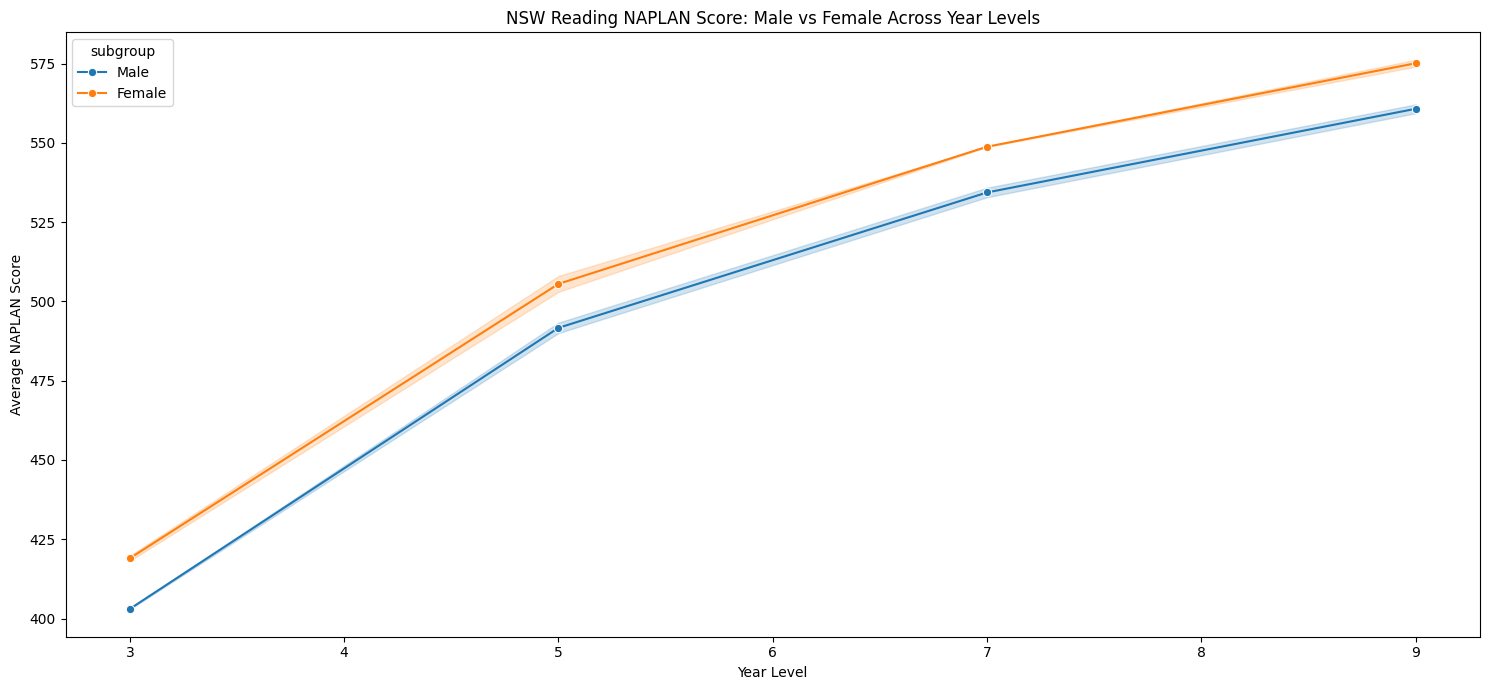

In [39]:
# Filter for gender rows in NSW and your chosen domain
gender_df = data[
    (data['state/territory'] == "New South Wales") &
    (data['domain'] == "Reading") &
    (data['student_attribute'] == "Gender") &
    (data['subgroup'].isin(["Male", "Female"]))
]

plt.figure(figsize=(15,7))
sns.lineplot(
    data=gender_df,
    x='year_level',
    y='average_naplan_score',
    hue='subgroup',
    marker='o',
    palette='tab10'
)
plt.title("NSW Reading NAPLAN Score: Male vs Female Across Year Levels")
plt.xlabel("Year Level")
plt.ylabel("Average NAPLAN Score")
plt.tight_layout()
plt.show()


## NAPLAN Reading Achievement Gaps
The NAPLAN visualization exposes persistent educational disparities:

Gender gap shows females consistently outperforming males across all school years
Indigenous gap presents a more significant concern, with a substantial and persistent difference
Parallel improvement trajectories indicate all groups benefit from education, but initial gaps remain largely unchanged
>These patterns highlight structural educational equity challenges requiring targeted interventions, particularly for Indigenous students.

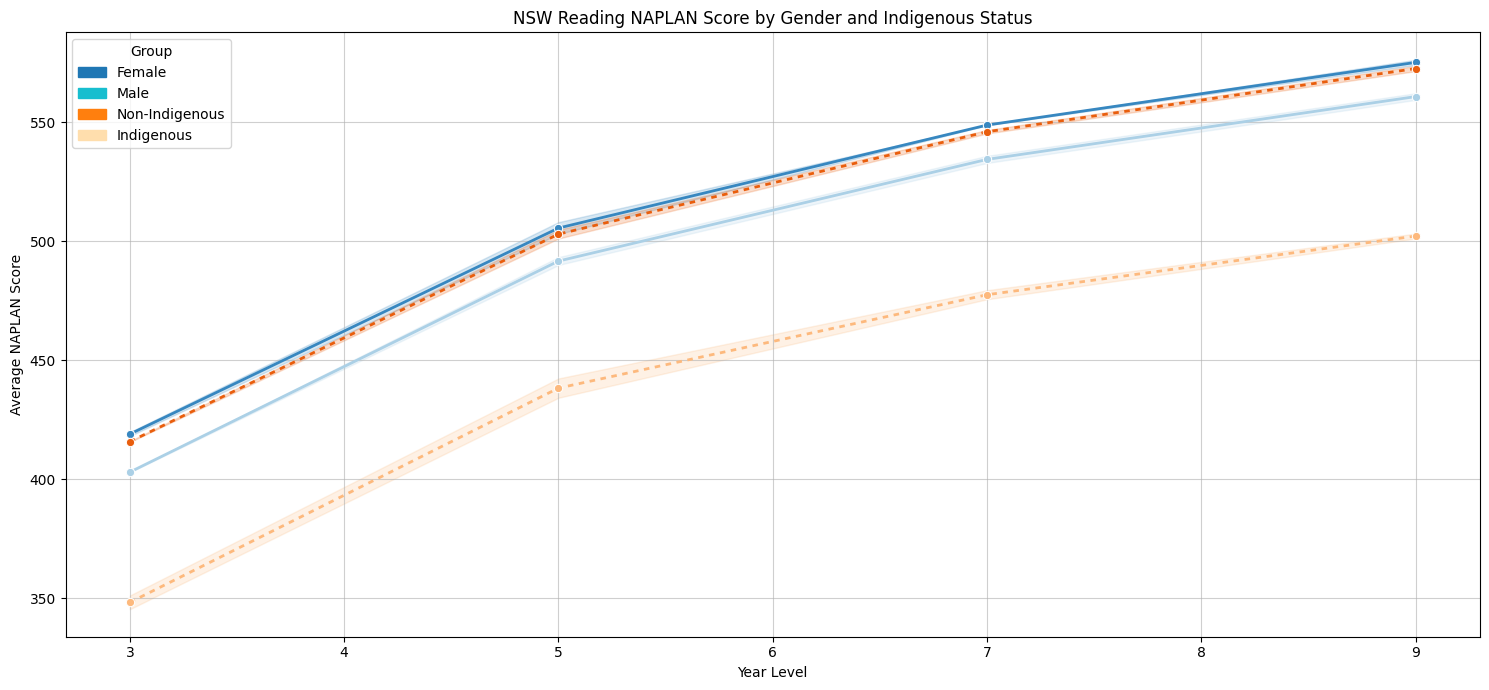

In [60]:
plt.figure(figsize=(15,7))
# Gender lines
gender_df = data[
    (data['state/territory'] == "New South Wales") &
    (data['domain'] == "Reading") &
    (data['student_attribute'] == "Gender") &
    (data['subgroup'].isin(["Male", "Female"])) &
    (data['year_level'].isin([3,5,7,9]))
]
sns.lineplot(
    data=gender_df,
    x='year_level',
    y='average_naplan_score',
    hue='subgroup',
    style='student_attribute',
    markers=True,
    dashes=False,
    linewidth=2,
    legend=False,   # We'll add custom legend
    palette='Blues'
)

# Indigeneity lines
indig_df = data[
    (data['state/territory'] == "New South Wales") &
    (data['domain'] == "Reading") &
    (data['student_attribute'] == "Indigeneity") &
    (data['subgroup'].isin(["Indigenous", "Non-Indigenous"])) &
    (data['year_level'].isin([3,5,7,9]))
]
sns.lineplot(
    data=indig_df,
    x='year_level',
    y='average_naplan_score',
    hue='subgroup',
    style='student_attribute',
    markers=True,
    dashes=[(2,2)],   # Dashed for indigeneity
    linewidth=2,
    legend=False,
    palette='Oranges'
)

# Custom legend
import matplotlib.patches as mpatches
handles = [
    mpatches.Patch(color='tab:blue', label='Female'),
    mpatches.Patch(color='tab:cyan', label='Male'),
    mpatches.Patch(color='tab:orange', label='Non-Indigenous'),
    mpatches.Patch(color='navajowhite', label='Indigenous')
]
plt.legend(handles=handles, title='Group')

plt.title("NSW Reading NAPLAN Score by Gender and Indigenous Status")
plt.xlabel("Year Level")
plt.ylabel("Average NAPLAN Score")
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

## Housing Market Analysis
Our property market visualizations demonstrate Australia's complex housing landscape:

Regional divergence reveals NSW's persistent premium and QLD's remarkable recent growth
Price-to-income ratios continue their concerning upward trajectory, crossing key stress thresholds
Empty dwellings paradox highlights distribution inefficiencies in our housing system
> The housing data suggests structural market issues rather than temporary imbalances, with implications for affordability and social equity.

In [55]:
# Gender
gender_df = (
    data[
        (data['state/territory'] == "New South Wales") &
        (data['domain'] == "Reading") &
        (data['student_attribute'] == "Gender") &
        (data['subgroup'].isin(["Male", "Female"])) &
        (data['year_level'].isin([3,5,7,9]))
    ]
    .groupby(['year_level', 'subgroup'])['average_naplan_score']
    .mean()
    .reset_index()
)

# Indigeneity
indig_df = (
    data[
        (data['state/territory'] == "New South Wales") &
        (data['domain'] == "Reading") &
        (data['student_attribute'] == "Indigeneity") &
        (data['subgroup'].isin(["Indigenous", "Non-Indigenous"])) &
        (data['year_level'].isin([3,5,7,9]))
    ]
    .groupby(['year_level', 'subgroup'])['average_naplan_score']
    .mean()
    .reset_index()
)

# Pivot
gender_wide = gender_df.pivot(index='year_level', columns='subgroup', values='average_naplan_score')
indig_wide = indig_df.pivot(index='year_level', columns='subgroup', values='average_naplan_score')

summary = pd.concat([gender_wide, indig_wide], axis=1)
summary = summary.rename_axis(None, axis=1)

print("Average NAPLAN Reading Scores by Year Level (NSW, 2023-2024):")
print(summary.round(1))


Average NAPLAN Reading Scores by Year Level (NSW, 2023-2024):
            Female   Male  Indigenous  Non-Indigenous
year_level                                           
3            419.0  403.0       348.3           415.8
5            505.5  491.7       438.3           503.0
7            548.8  534.4       477.5           546.0
9            575.1  560.8       502.2           572.6
